# PRCP-1016-Heart Disease Prediction

## Table of contents
1. Overview
2. Domain Analysis
3. Exploratory Data Analysis
4. Data Preprocessing
5. Scaling Data
6. Model Creation
7. Machine Learning Models:
  - Logistic Regression
  - K-Nearest Neighbours (KNN)
  - Support Vector Machine
  - Gradient Boosting
  - XGBoost
6. Model Performance Summary
7. Conclusion
8. Challenges faced
9. Recommendation
            

## 1. Overview
- Cardiovascular diseases (CVDs) are the leading cause of death globally, responsible for about 17.9 million deaths annually, accounting for 31% of all global deaths. Most CVD-related deaths result from heart attacks and strokes, with a significant portion occurring in people under 70 years old. Early detection and management of individuals at high cardiovascular risk — due to factors like hypertension, diabetes, or high cholesterol — are crucial. This dataset, containing 11 health-related features, can be used to develop machine learning models for predicting potential heart disease and supporting timely medical intervention.

## 2. Domain Analysis

1. Patient ID: A unique random identifier assigned to each patient.
Used only for identification, not for medical analysis.

2. slope_of_peak_exercise_st_segment: Refers to the slope of the ST segment during peak exercise.
Helps assess blood flow and heart performance under stress.
3. thal: Result of the thallium stress test (normal, fixed defect, reversible defect).Indicates blood flow abnormalities in the heart muscle.
4. resting_blood_pressure: Patient’s blood pressure while at rest (in mm Hg).
Important measure for identifying hypertension or heart risk.
5. chest_pain_type: Describes type of chest pain experienced (4 categories).
Different pain types relate to different heart conditions.
6. num_major_vessels: Number of major blood vessels (0–3) detected by fluoroscopy.
 More vessels affected usually means higher heart disease risk.
7. fasting_blood_sugar_gt_120_mg_per_dl: Shows if fasting blood sugar is >120 mg/dl (1 = Yes, 0 = No).
A value of 1 indicates potential diabetes risk.
8. resting_ekg_results: Resting electrocardiogram outcome (0, 1, or 2).
Provides baseline information about heart electrical activity.
9. serum_cholesterol_mg_per_dl: Patient’s cholesterol level in mg/dl.
Higher cholesterol increases chances of heart disease.
10. oldpeak_eq_st_depression: ST depression during exercise compared to rest.
Used to detect abnormal heart function under stress.
11. sex: Biological sex of the patient (0 = Female, 1 = Male).
Risk factors and symptoms may differ by sex.
12. age: Patient’s age in years.
Older age generally increases heart disease risk.
13. max_heart_rate_achieved: Maximum heart rate reached during exercise test.
Indicates cardiovascular fitness and stress tolerance.
14. exercise_induced_angina: Chest pain triggered by exercise (1 = Yes, 0 = No).
Presence indicates compromised blood flow during activity.
heart_disease_present: Target variable (1 = Yes, 0 = No).
Tells whether the patient is diagnosed with heart disease.

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
# Reading Both the files
val = pd.read_csv('values.csv')
la = pd.read_csv('labels.csv')

In [248]:
# Merge both the files into one
df = pd.merge(val, la, on='patient_id')

In [249]:
# Merged Sucessfully
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [250]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


### Check Duplicate's

In [251]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Dataset
- #### The dataset consists of 180 records and 15 columns, containing patient health details and diagnostic results. Each row represents an individual patient, with features such as age, blood pressure, cholesterol levels, ECG readings, and other clinical indicators, along with a target column indicating the presence or absence of heart disease.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [253]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Renaming the columns

In [254]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [255]:
df.columns = [
    'patient_id',
    'st_slope',
    'thal',
    'resting_bp',
    'chest_pain_type',
    'num_major_vessels',
    'fasting_bs',
    'resting_ecg',
    'serum_cholesterol',
    'oldpeak',
    'sex',
    'age',
    'max_heart_rate',
    'exercise_angina',
    'heart_disease'
]

## 3. Exploratory Data Analysis [EDA]

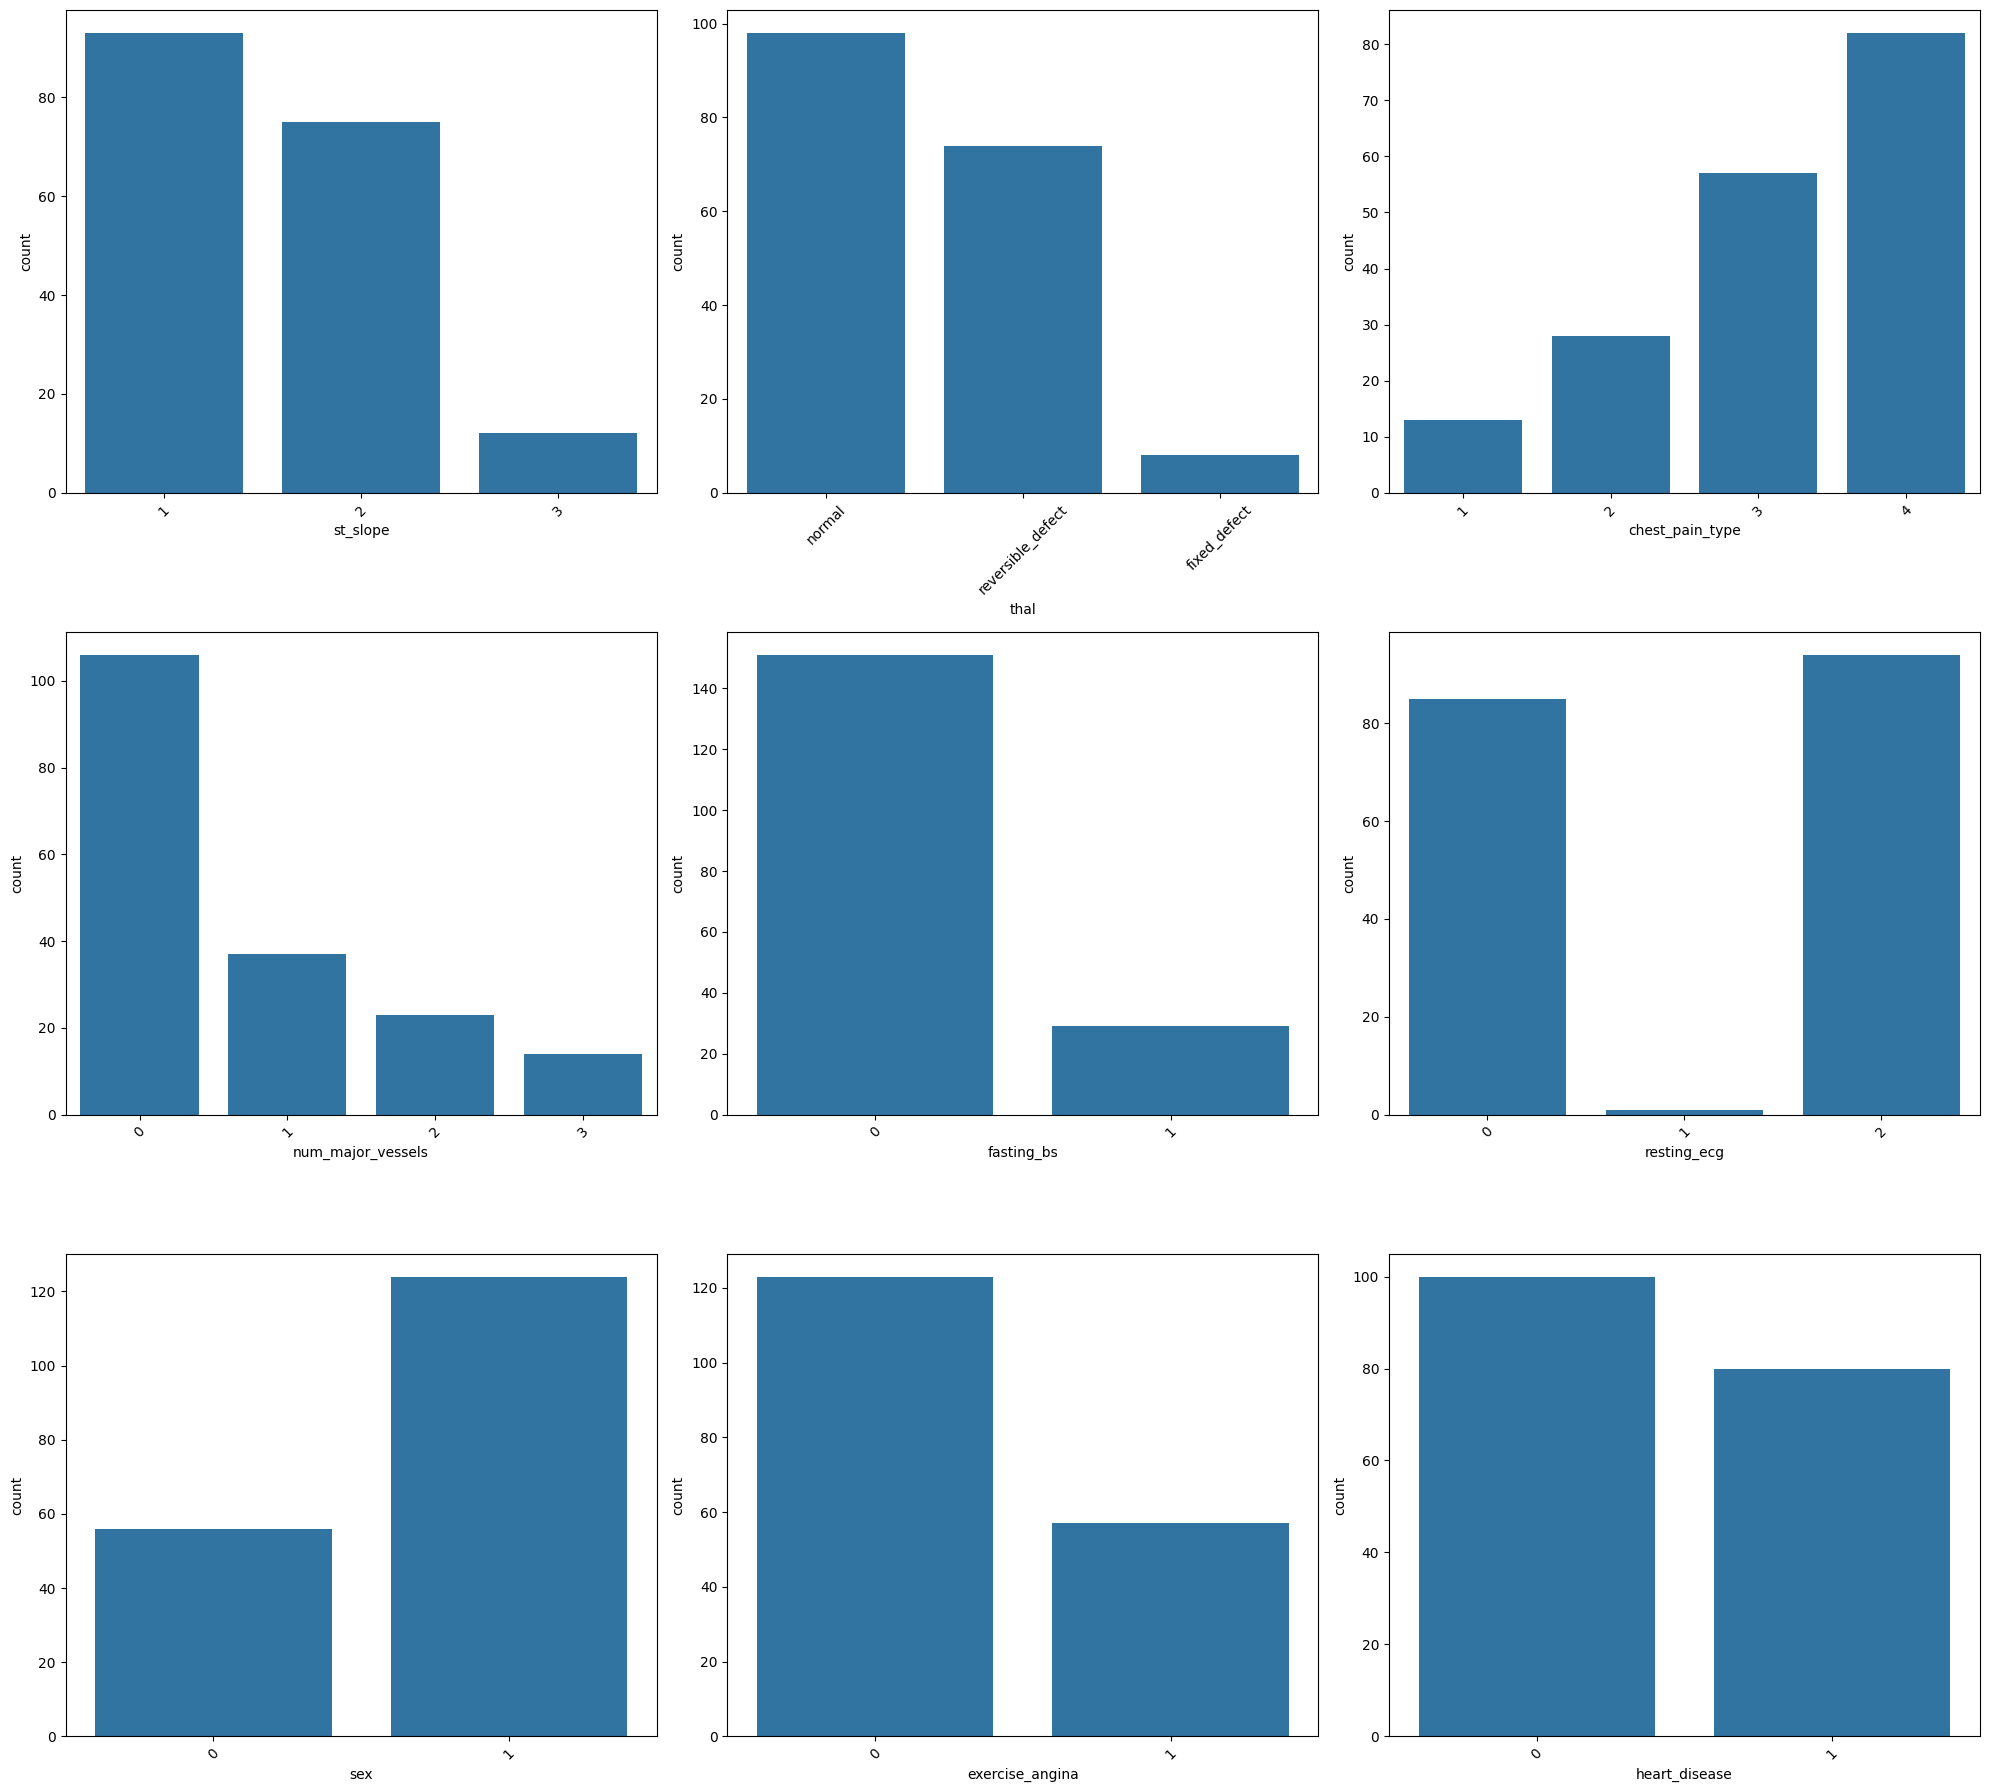

In [256]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(5,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df[i])
        plotnumber += 1

plt.tight_layout()
plt.savefig('countplot.png')

### Insights

1. st_slope: Most patients have type 1 slope (possibly representing an upsloping ST segment), followed by type 2.Type 3 slope is rare, suggesting it may be a marker of unusual cases or severe conditions in a smaller subset.

2. thal: Majority have a normal thalassemia test result, while a significant number show a reversible defect.
  Fixed defect cases are rare but could indicate irreversible myocardial damage — potentially a high-risk group.

3. chest_pain_type: Type 4 chest pain (possibly    asymptomatic) is the most common, followed by type 3.
  Type 1 chest pain (likely typical angina) is the least common, meaning fewer patients present with classical angina symptoms.
  High asymptomatic cases suggest the dataset has many silent heart disease risks.

4. num_major_vessels: Most patients have 0 major vessels colored by fluoroscopy, followed by 1 or 2.
  Having 3 is rare, but this could be an indicator of severe coronary artery disease in those few cases.

5. fasting_bs: A majority have normal fasting blood sugar  
    A smaller group has high fasting blood sugar (≥120 mg/dl), which is often linked to diabetes — a known risk factor for heart disease.

6. resting_ecg: Distribution is almost even between types 0 and 2.Type 1 ECG readings are rare, potentially representing an uncommon cardiac electrical pattern.

7. sex: More male patients than females in the dataset.
  Could introduce gender bias in risk modeling — careful balancing may be needed in predictive analysis.

8. exercise_angina: Majority have no exercise-induced angina, but a significant portion do.
  Those with angina during exercise may represent a higher-risk group for ischemia or blocked arteries.

9. heart_disease:Class distribution is relatively balanced slightly more patients without heart disease.
  This balance is beneficial for predictive modeling, reducing class imbalance issues.

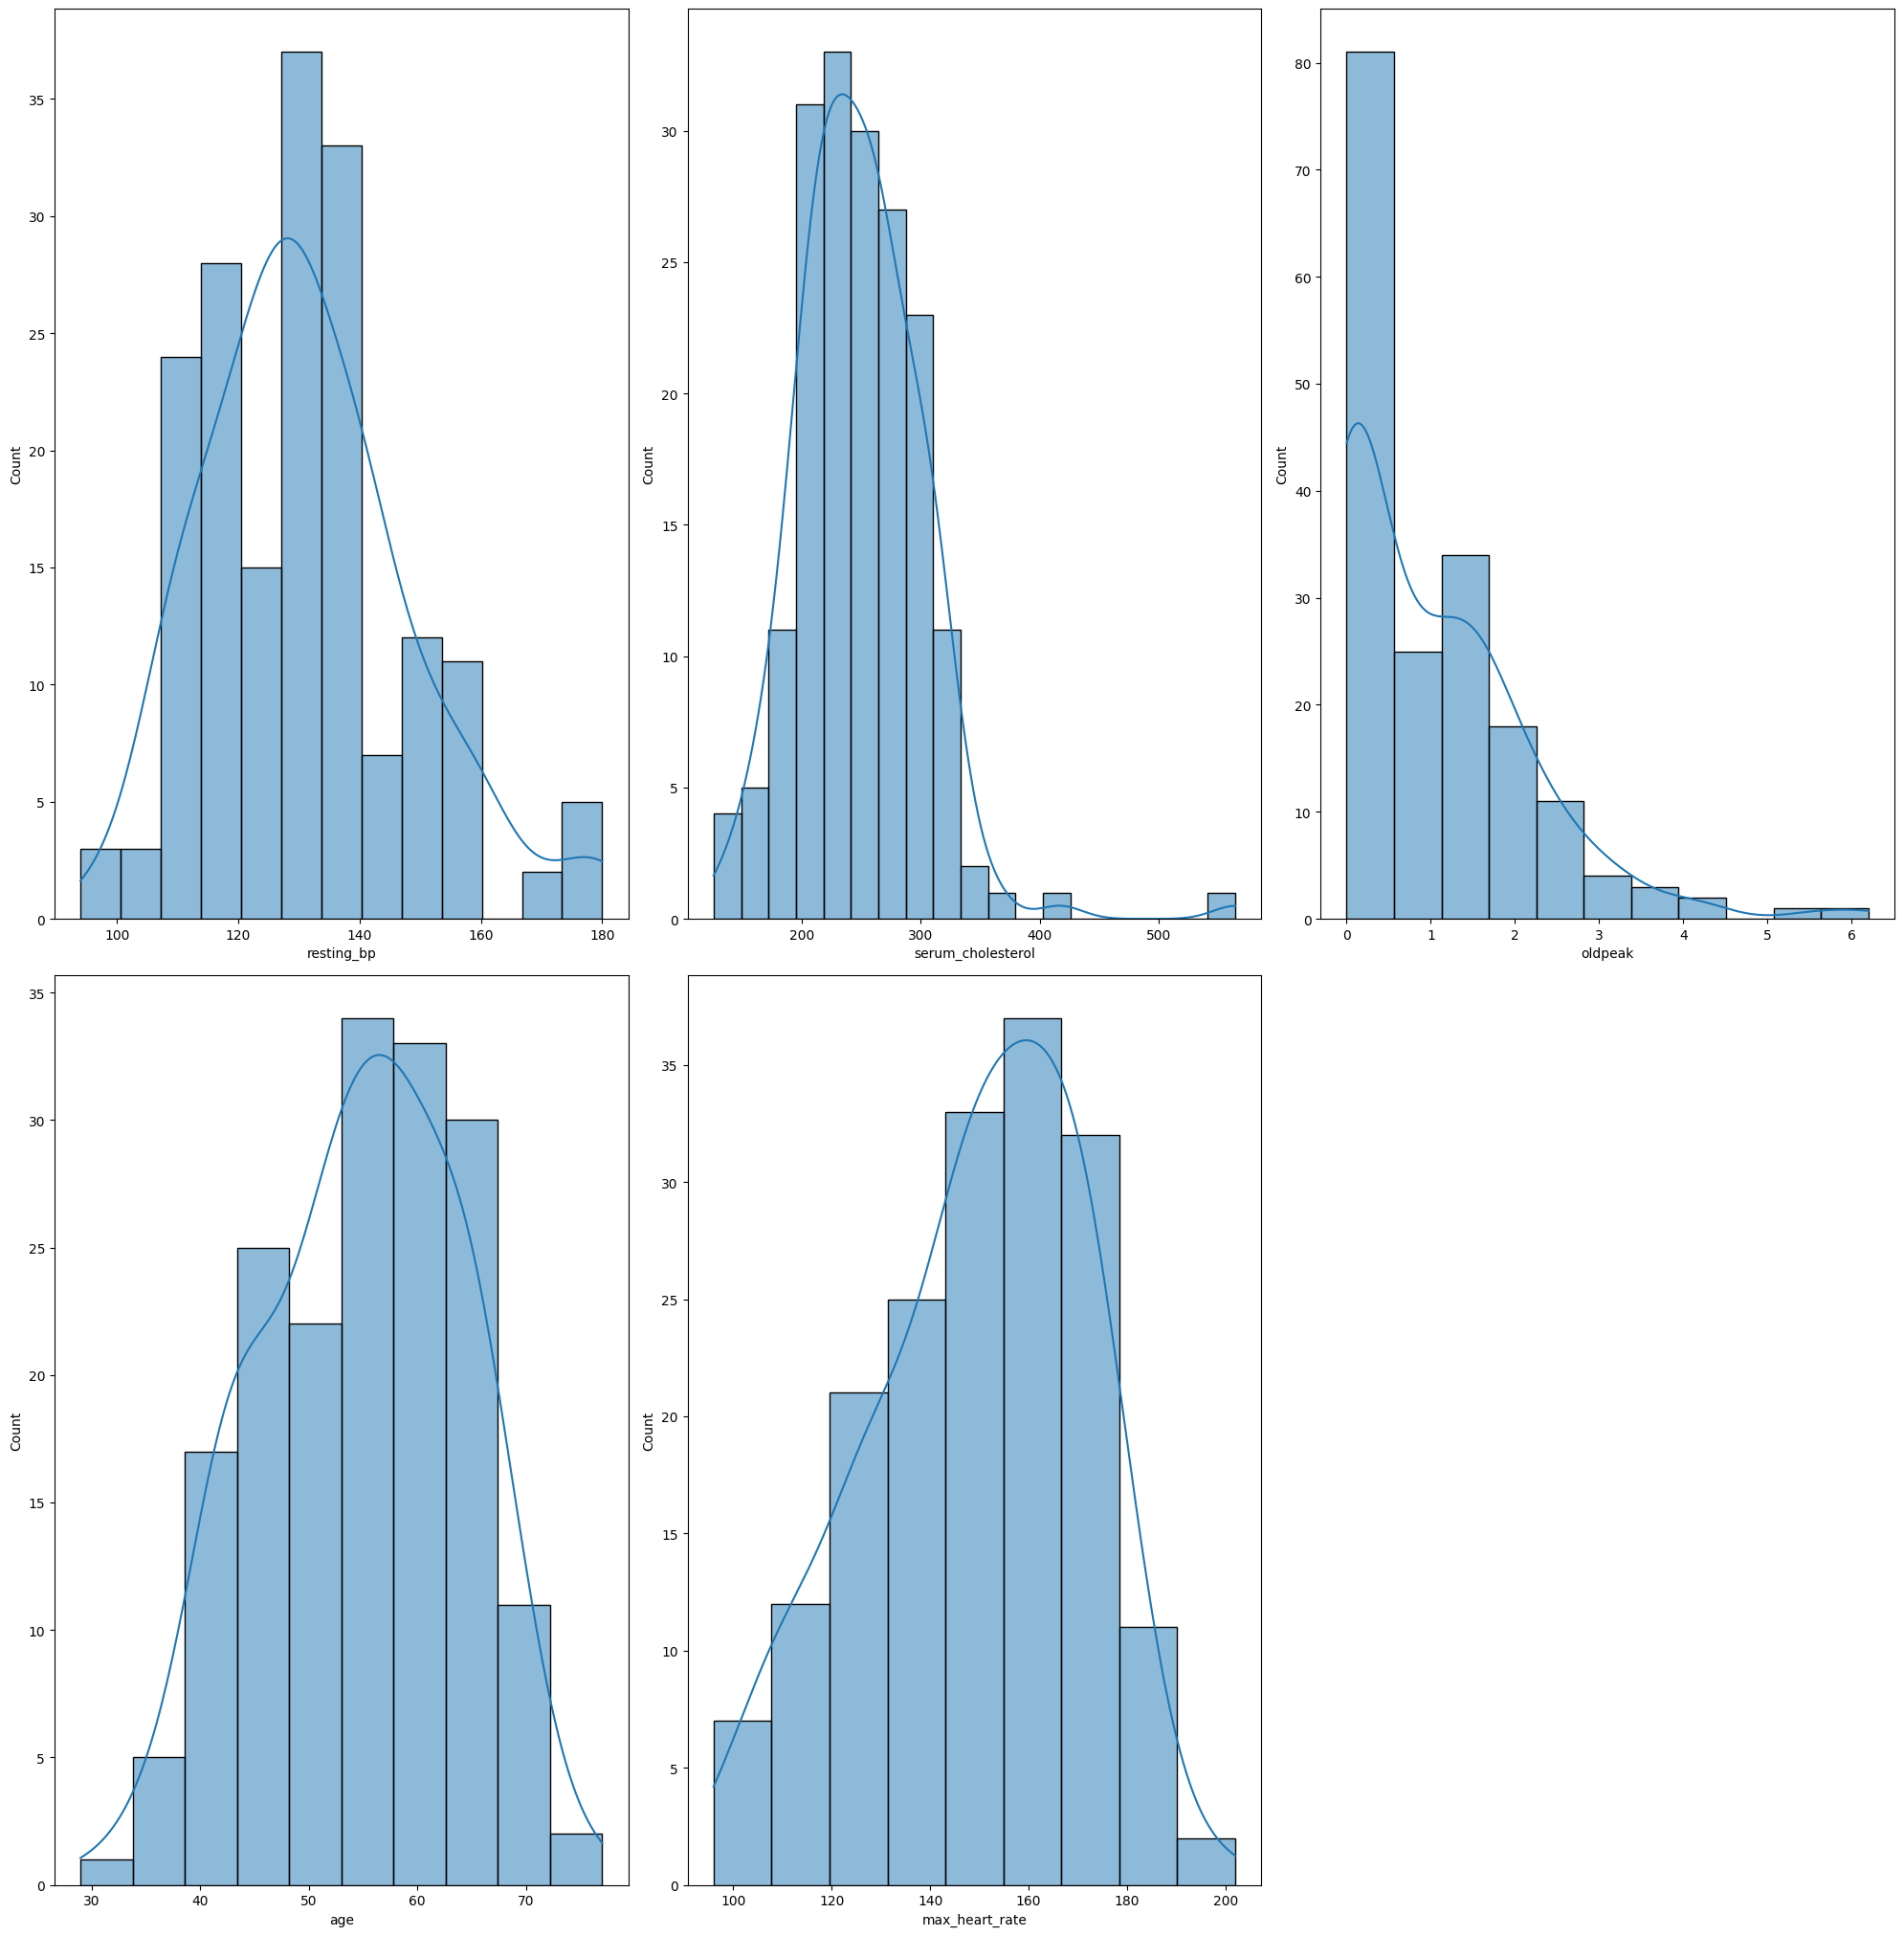

In [257]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) > 20 and (df[i].dtype == "int64" or df[i].dtype == "float64") :
        plt.subplot(3,3,plotnumber)
        sns.histplot(x = df[i],kde=True)
        plotnumber += 1

plt.tight_layout()
plt.savefig('outliner.png')

### Insights

1. resting_bp (Resting Blood Pressure): The distribution is roughly bell-shaped but shows a slight right skew. This indicates that while most individuals have a blood pressure in the central range (approx. 110-140), a few have significantly higher values, which are potential outliers.

2. serum_cholesterol: This feature is strongly right-skewed. The majority of data points are concentrated between 200 and 300, but there is a long tail extending to the right with clear outliers, including values above 400 and one near 600.

3. oldpeak: This distribution is extremely right-skewed. An overwhelming majority of the values are clustered between 0 and 1, while a few extreme outliers stretch the distribution's tail out towards a value of 6.

4. age: This plot shows the most symmetrical, bell-shaped (normal) distribution of the set. It is centered around 55-60 years of age and does not have any obvious outliers.

5. max_heart_rate: This feature is moderately left-skewed. The data peaks at higher heart rates (around 150-170) with a tail extending towards lower values. This distribution appears plausible without any extreme outliers.

## Bivarient Analysis

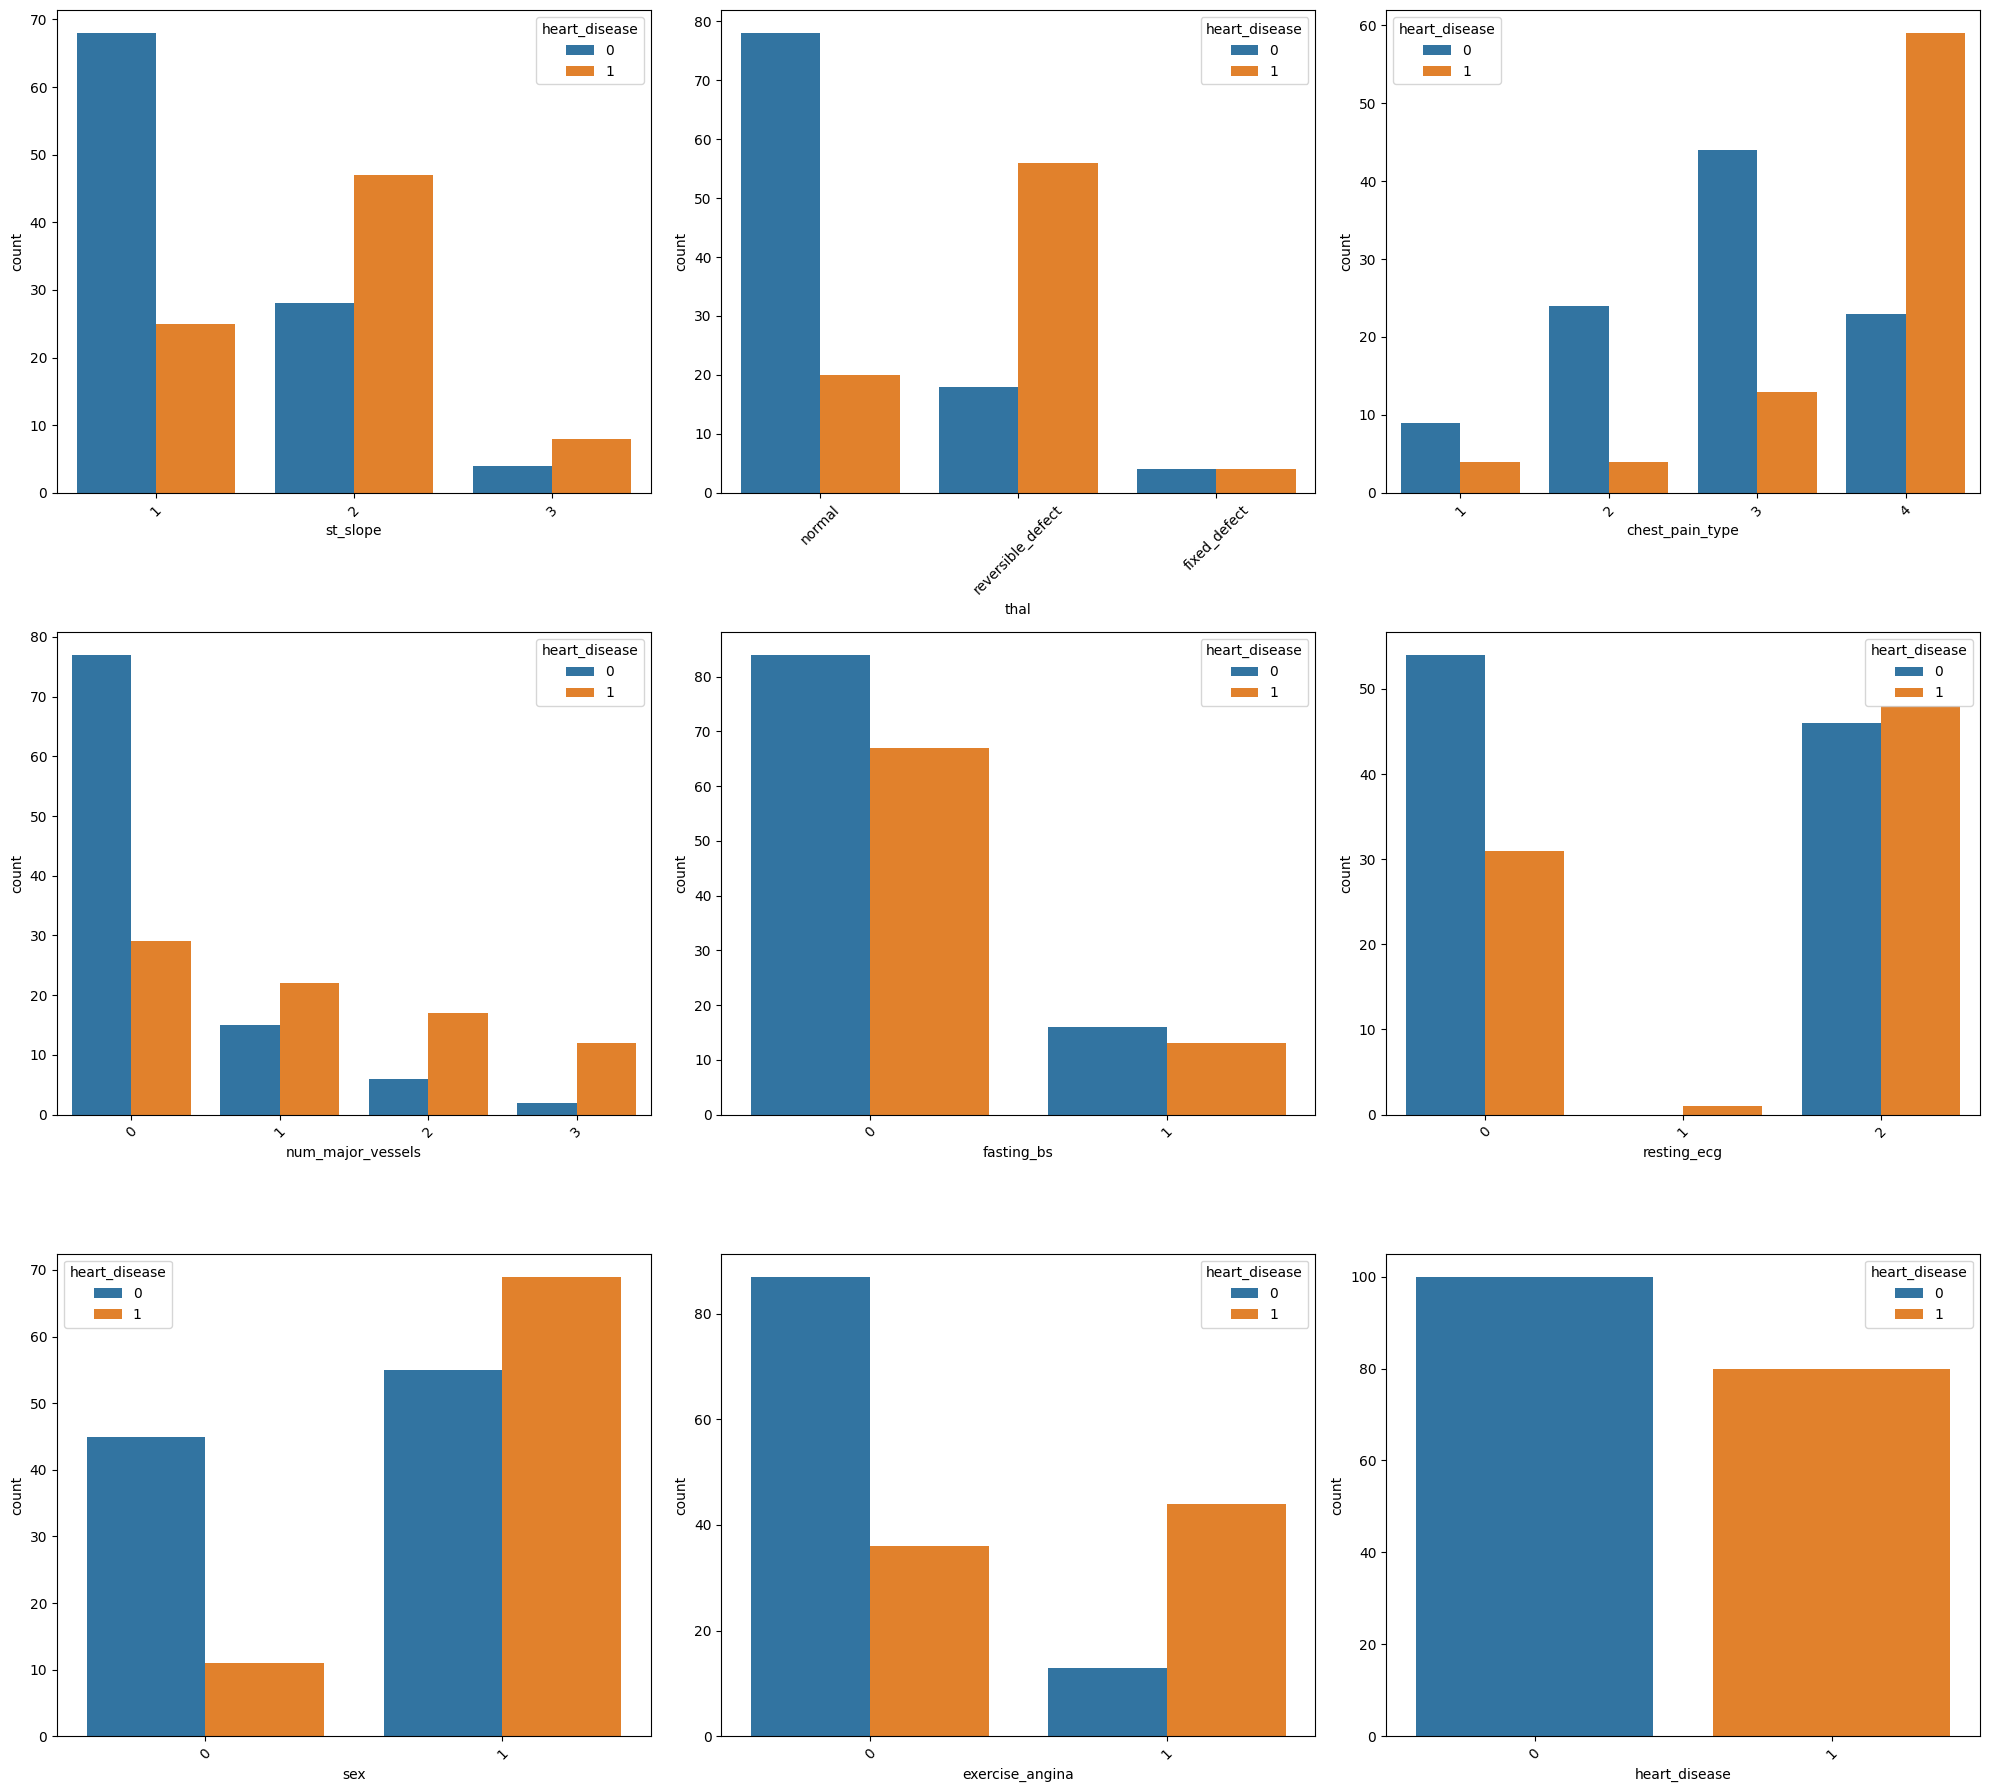

In [258]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(5,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df[i],hue=df.heart_disease)
        plotnumber += 1

plt.tight_layout()
plt.savefig('Bivarient.png')

## Insights

1. st_slope vs heart_disease
Type 2 slope is strongly associated with heart disease, while type 1 slope is more common among patients without heart disease.
Type 3 slope is rare but appears slightly more in heart disease cases.

2. thal vs heart_disease
Reversible defect is highly associated with heart disease.
Normal thalassemia is more common in non-heart-disease patients.
Fixed defect is rare but slightly more frequent in heart disease cases.

3. chest_pain_type vs heart_disease
Type 4 chest pain is much more frequent in heart disease patients.
Type 1 and 2 chest pains are mostly seen in non-heart-disease cases.
Suggests asymptomatic pain type is a strong risk marker.
4. num_major_vessels vs heart_disease
Patients with 0 major vessels are mostly non-heart-disease cases.
Having 1, 2, or 3 major vessels increases the proportion of heart disease patients.
5. fasting_bs vs heart_disease
Fasting blood sugar ≥120 mg/dl is slightly more common in heart disease cases.
However, many patients with normal fasting blood sugar still have heart disease, so it’s not a sole determinant.
6. resting_ecg vs heart_disease
ECG type 1 is rare and only present in heart disease cases.
ECG type 0 is more frequent in non-heart-disease patients.
ECG type 2 has a balanced distribution across both groups.
7. sex vs heart_disease
Male patients have a higher proportion of heart disease compared to females.
Female patients are more often in the non-heart-disease group.
8. exercise_angina vs heart_disease
Exercise-induced angina is far more common among heart disease patients.
No exercise angina is much more common among non-heart-disease patients.
9. heart_disease (target)
The dataset has a slightly higher number of non-heart-disease cases compared to heart-disease cases, meaning class imbalance is minimal.

## 4. Data Preprocessing

### Check Null values

In [259]:
df.isnull().sum()

,0
patient_id,0
st_slope,0
thal,0
resting_bp,0
chest_pain_type,0
num_major_vessels,0
fasting_bs,0
resting_ecg,0
serum_cholesterol,0
oldpeak,0


### Handling Categorical Variables

#### Convert categorical_cols to One Hot Encoding as they dont have a specific order

In [260]:
categorical_cols = ["st_slope", "thal", "chest_pain_type", "num_major_vessels", "resting_ecg"]

In [261]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [262]:
df.head()

,patient_id,resting_bp,fasting_bs,serum_cholesterol,oldpeak,sex,age,max_heart_rate,exercise_angina,heart_disease,...,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ecg_1,resting_ecg_2
0,0z64un,128,0,308,0.0,1,45,170,0,0,...,1,0,1,0,0,0,0,0,0,1
1,ryoo3j,110,0,214,1.6,0,54,158,0,0,...,1,0,0,1,0,0,0,0,0,0
2,yt1s1x,125,0,304,0.0,1,77,162,1,1,...,1,0,0,0,1,0,0,1,0,1
3,l2xjde,152,0,223,0.0,1,40,181,0,1,...,0,1,0,0,1,0,0,0,0,0
4,oyt4ek,178,0,270,4.2,1,59,145,0,0,...,0,1,0,0,0,0,0,0,0,1


### Checking Outliners

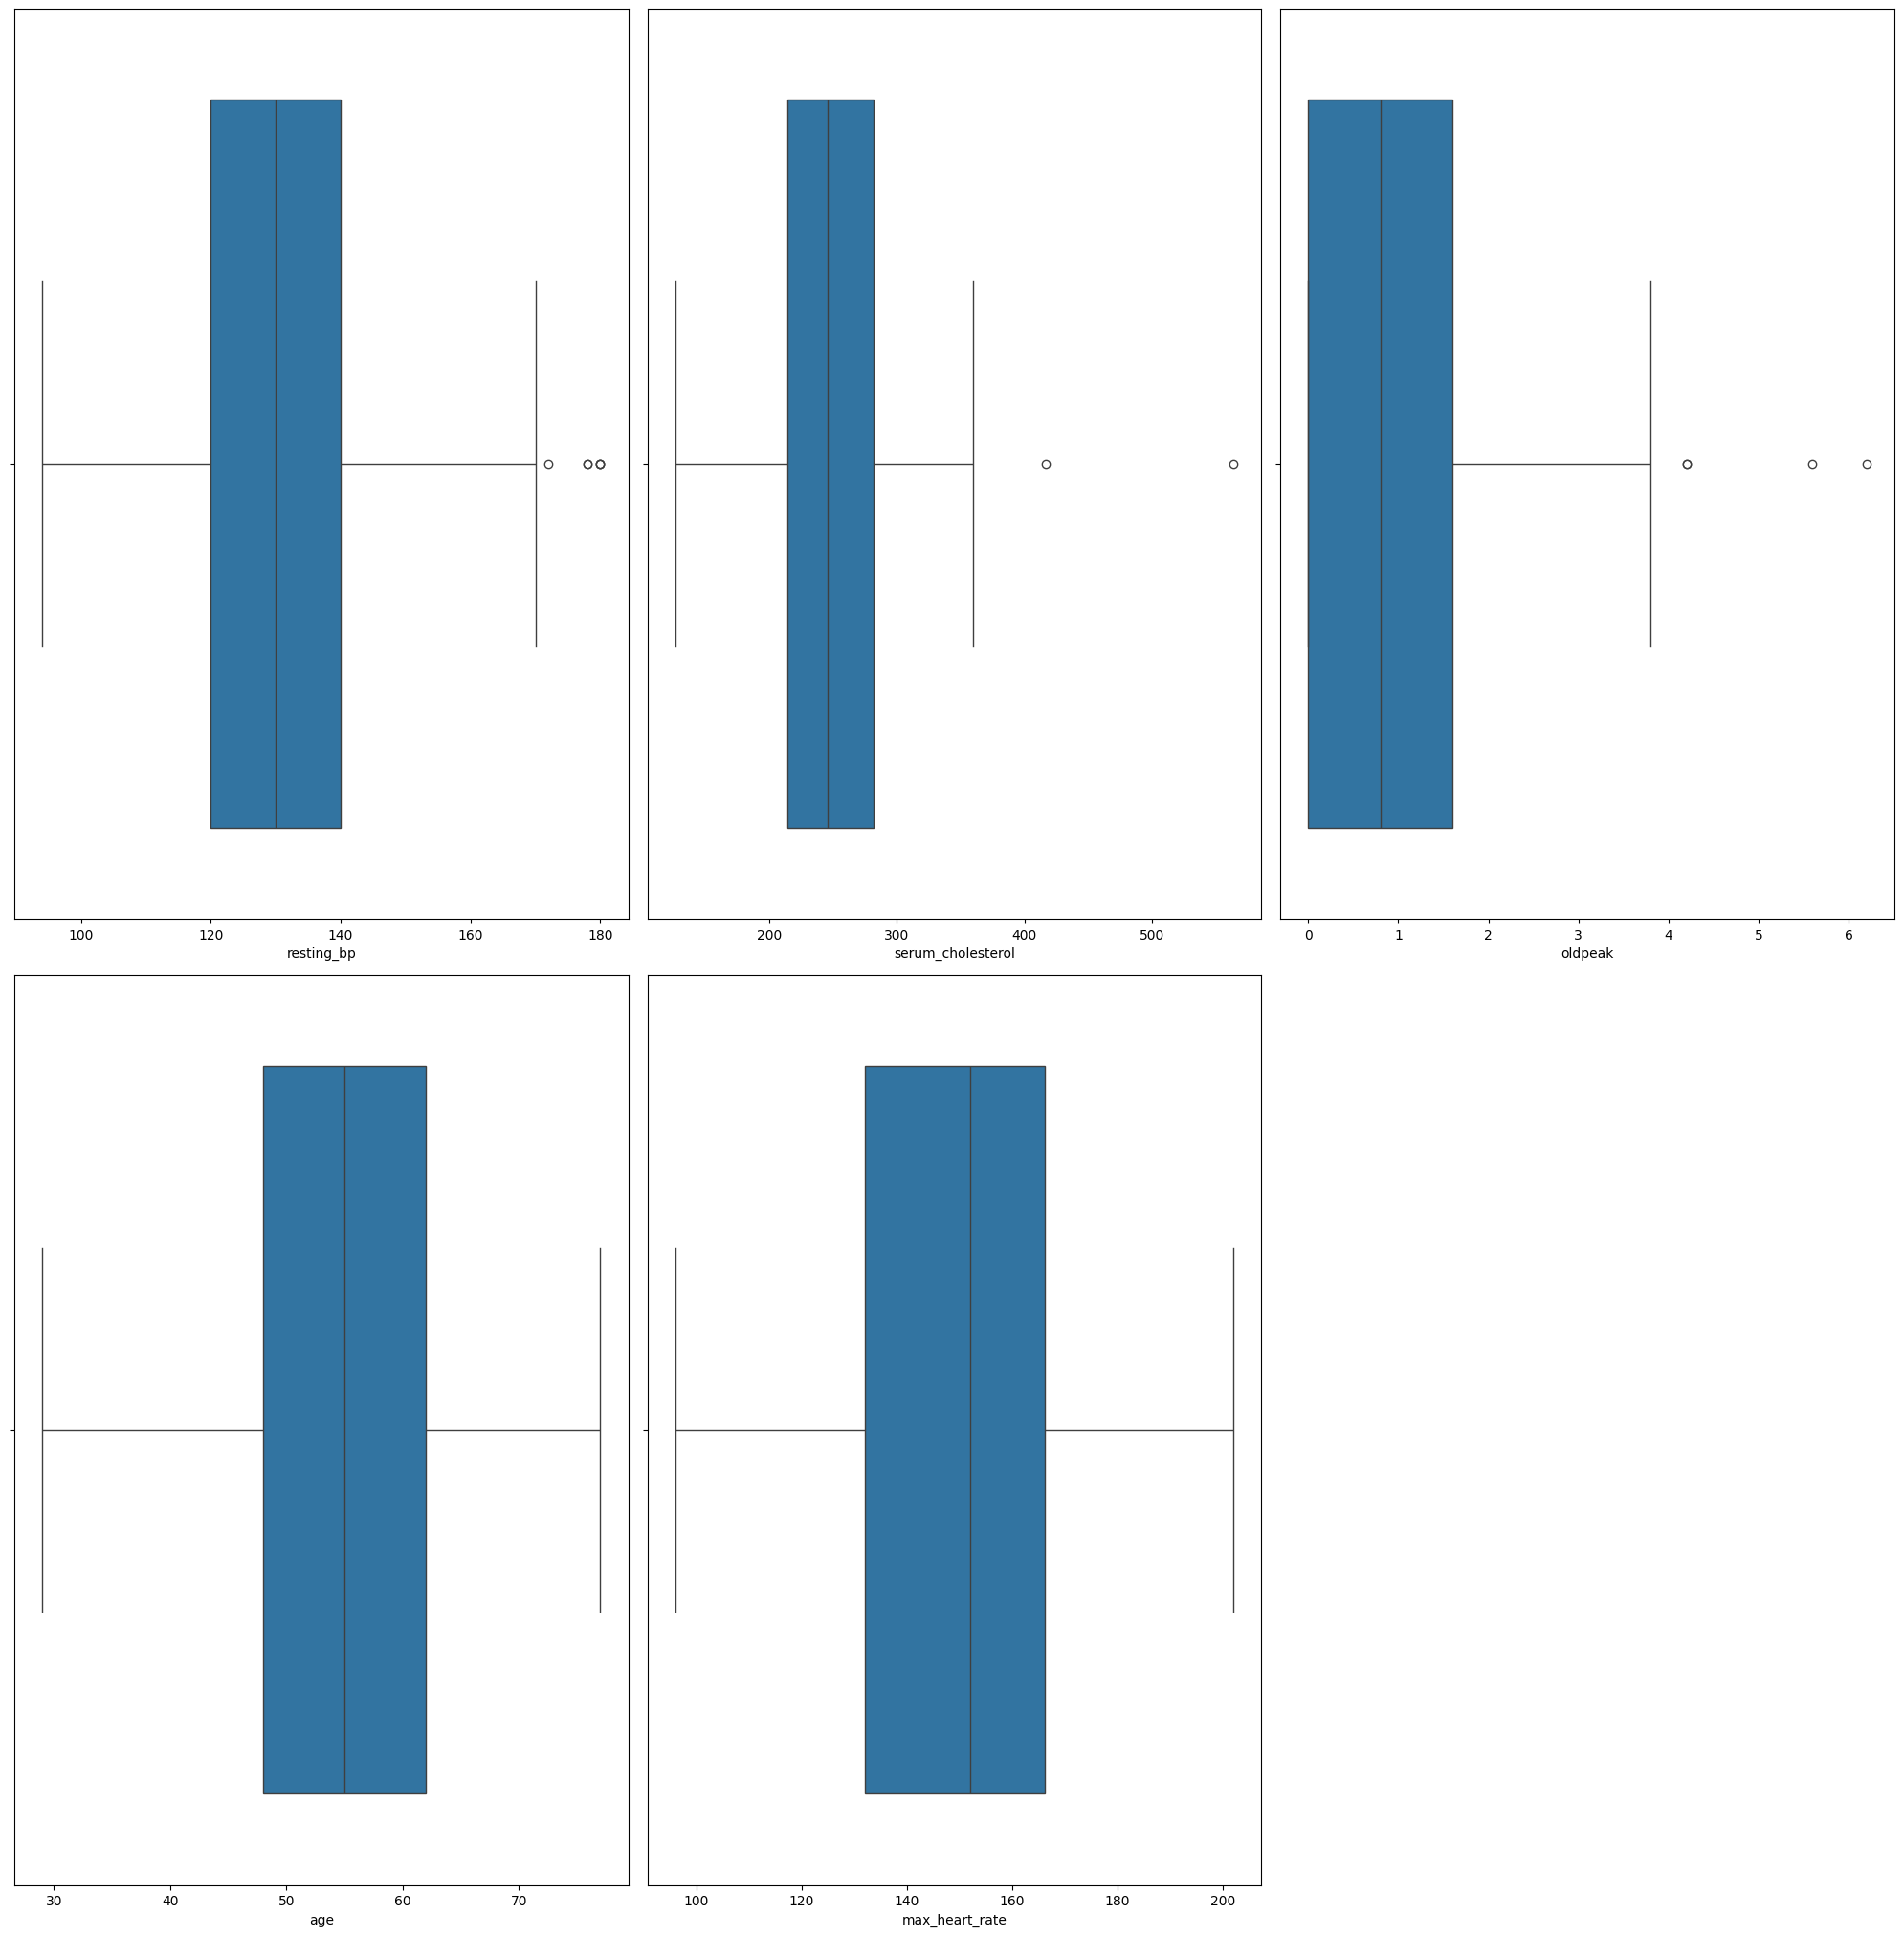

In [263]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) > 20 and (df[i].dtype == "int64" or df[i].dtype == "float64") :
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x = df[i])
        plotnumber += 1

plt.tight_layout()
plt.savefig('outliners1.png')

### Handling Outliners

##### Handling Oldpeak outliner

<Axes: xlabel='oldpeak_log'>

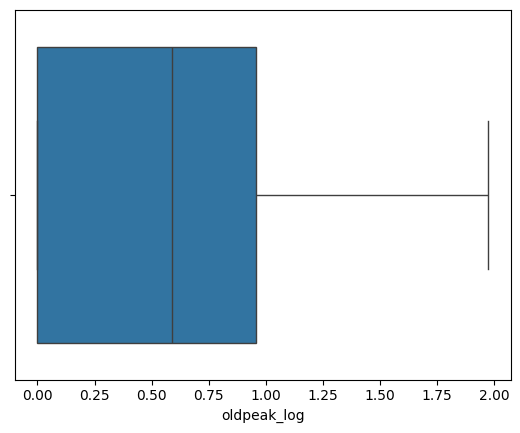

In [264]:
# Applying Log transformation on the column
df['oldpeak_log'] = np.log1p(df['oldpeak'])
sns.boxplot(x = df['oldpeak_log'])

#### Fixing Serum cholesterol

<Axes: xlabel='serum_cholesterol_log'>

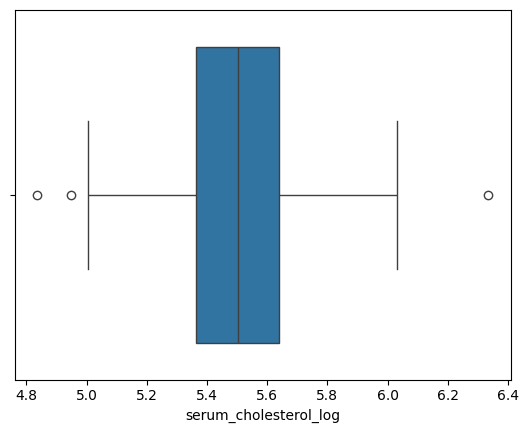

In [265]:
df['serum_cholesterol_log'] = np.log(df['serum_cholesterol'])
sns.boxplot(x = df['serum_cholesterol_log'])

<Axes: xlabel='serum_cholesterol_final'>

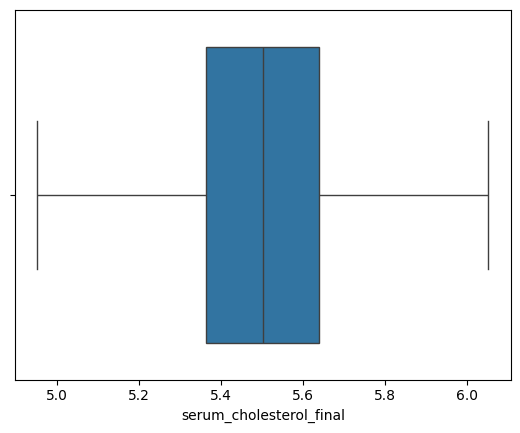

In [266]:
# Cap the remaining outliers on your log-transformed data
Q1 = df['serum_cholesterol_log'].quantile(0.25)
Q3 = df['serum_cholesterol_log'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Create the final feature for your model
df['serum_cholesterol_final'] = df['serum_cholesterol_log'].clip(lower=lower_limit, upper=upper_limit)
sns.boxplot(x = df['serum_cholesterol_final'])

#### Fixing resting BP

<Axes: xlabel='resting_bp_final'>

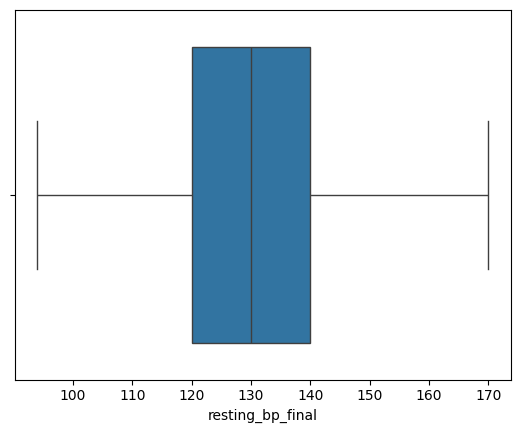

In [267]:
# Calculate the upper limit using the IQR method
Q1 = df['resting_bp'].quantile(0.25)
Q3 = df['resting_bp'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# Create the final, capped feature for your models
# We only need to set the 'upper' parameter since all outliers are high
df['resting_bp_final'] = df['resting_bp'].clip(upper=upper_limit)
sns.boxplot(x = df['resting_bp_final'])

### Remove Old and Unwanted columns columns

In [268]:
# Old Columns
df.drop('resting_bp',axis=1,inplace=True)
df.drop('serum_cholesterol',axis=1,inplace=True)
df.drop('oldpeak',axis=1,inplace=True)
df.drop('serum_cholesterol_log',axis=1,inplace=True)
df.drop('patient_id',axis=1,inplace=True)

### Check the correlation

In [269]:
df.head()

,fasting_bs,sex,age,max_heart_rate,exercise_angina,heart_disease,st_slope_2,st_slope_3,thal_normal,thal_reversible_defect,...,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ecg_1,resting_ecg_2,oldpeak_log,serum_cholesterol_final,resting_bp_final
0,0,1,45,170,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.000000,5.730100,128
1,0,0,54,158,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0.955511,5.365976,110
2,0,1,77,162,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0.000000,5.717028,125
3,0,1,40,181,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0.000000,5.407172,152
4,0,1,59,145,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1.648659,5.598422,170


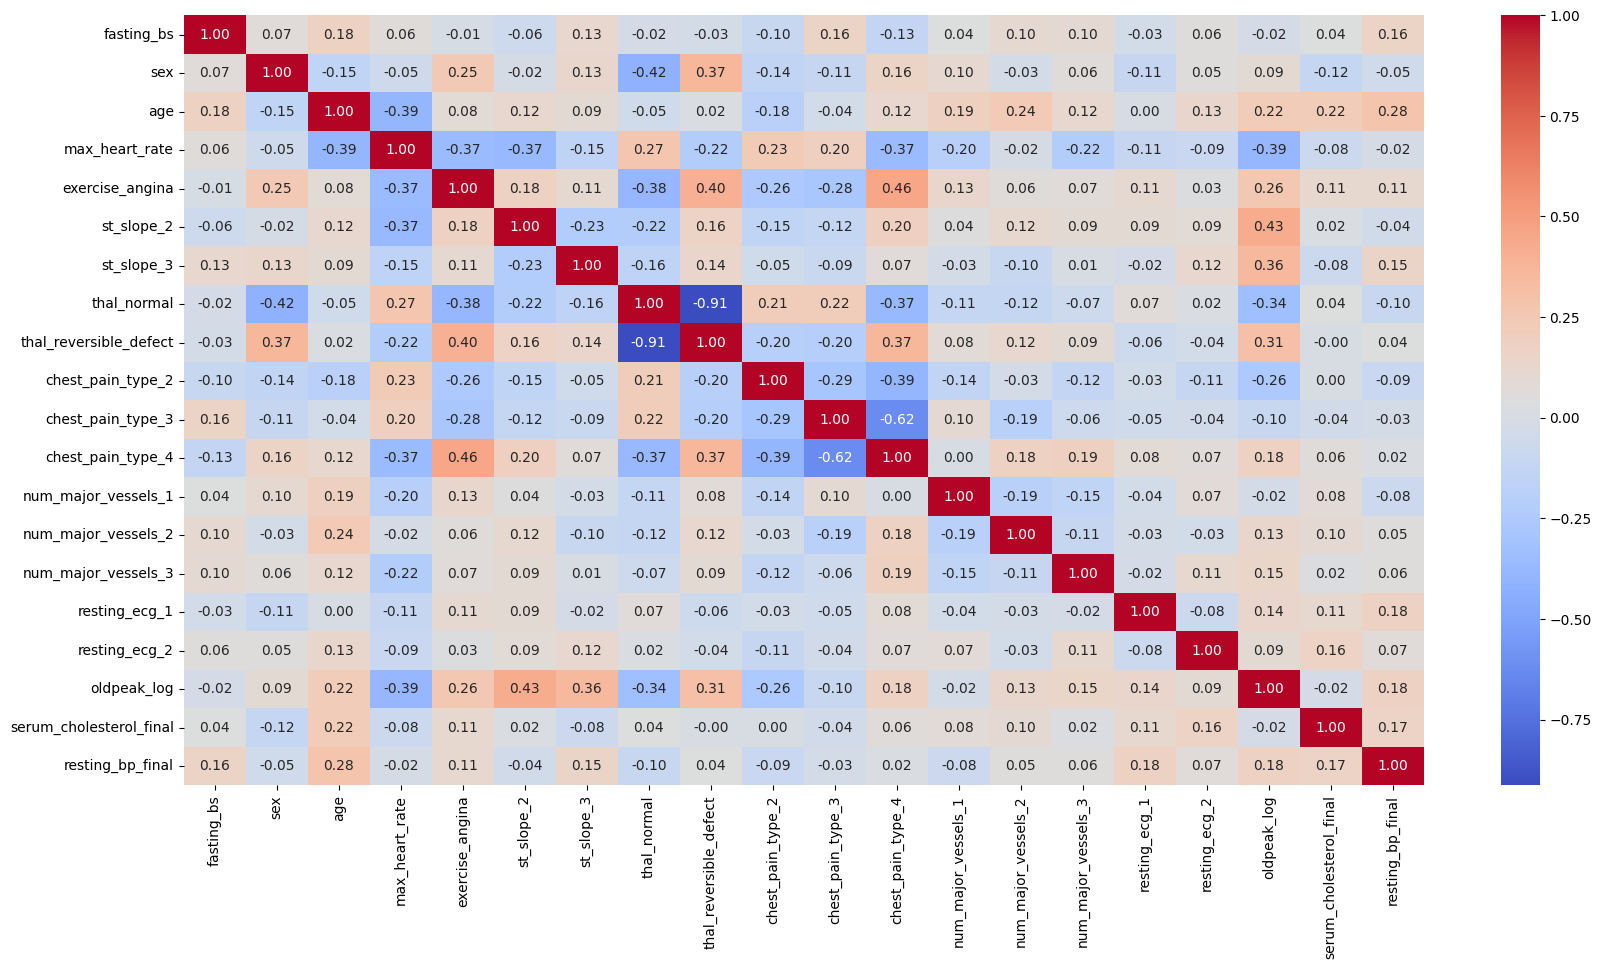

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.drop('heart_disease', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

plt.show()

In [271]:
df.drop('heart_disease',axis=1).corr()

,fasting_bs,sex,age,max_heart_rate,exercise_angina,st_slope_2,st_slope_3,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ecg_1,resting_ecg_2,oldpeak_log,serum_cholesterol_final,resting_bp_final
fasting_bs,1.000000,0.066010,0.176101,0.058369,-0.005956,-0.063858,0.125202,-0.023938,-0.028324,-0.104701,0.156474,-0.127780,0.038849,0.103860,0.098429,-0.032755,0.056137,-0.021832,0.040281,0.162294
sex,0.066010,1.000000,-0.148997,-0.053960,0.251096,-0.016227,0.131497,-0.421950,0.366381,-0.142008,-0.110069,0.156893,0.104266,-0.030355,0.060739,-0.111222,0.053922,0.093281,-0.118681,-0.048326
age,0.176101,-0.148997,1.000000,-0.394630,0.081811,0.120046,0.091555,-0.049719,0.020593,-0.183951,-0.036223,0.120422,0.187545,0.240167,0.123997,0.001517,0.126357,0.224260,0.223246,0.283972
max_heart_rate,0.058369,-0.053960,-0.394630,1.000000,-0.365065,-0.367862,-0.153660,0.271064,-0.219006,0.232320,0.195112,-0.366888,-0.198625,-0.015972,-0.218508,-0.110349,-0.094242,-0.387984,-0.081623,-0.015768
exercise_angina,-0.005956,0.251096,0.081811,-0.365065,1.000000,0.175629,0.105332,-0.384491,0.402114,-0.259222,-0.283697,0.456433,0.126589,0.061412,0.069862,0.109797,0.029488,0.256027,0.112652,0.111932
st_slope_2,-0.063858,-0.016227,0.120046,-0.367862,0.175629,1.000000,-0.225877,-0.222499,0.164133,-0.145095,-0.115067,0.199872,0.044152,0.115328,0.091164,0.088438,0.086479,0.427030,0.017576,-0.039715
st_slope_3,0.125202,0.131497,0.091555,-0.153660,0.105332,-0.225877,1.000000,-0.158013,0.138811,-0.053257,-0.086181,0.068572,-0.025720,-0.102294,0.005544,-0.019976,0.121873,0.356803,-0.077788,0.153974
thal_normal,-0.023938,-0.421950,-0.049719,0.271064,-0.384491,-0.222499,-0.158013,1.000000,-0.913417,0.207928,0.215027,-0.372822,-0.114406,-0.117694,-0.067569,0.068370,0.018362,-0.337287,0.035960,-0.098988
thal_reversible_defect,-0.028324,0.366381,0.020593,-0.219006,0.402114,0.164133,0.138811,-0.913417,1.000000,-0.202842,-0.204698,0.369297,0.077923,0.119878,0.094623,-0.062451,-0.037171,0.309915,-0.001384,0.042832
chest_pain_type_2,-0.104701,-0.142008,-0.183951,0.232320,-0.259222,-0.145095,-0.053257,0.207928,-0.202842,1.000000,-0.292174,-0.392601,-0.142455,-0.026529,-0.124643,-0.032080,-0.111156,-0.262056,0.001119,-0.094456


### Seperate Target column

In [272]:
X = df.drop('heart_disease',axis=1)
y = df['heart_disease']

### Split train and test the dataset

In [273]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
x_train.shape

(144, 20)

In [275]:
y_test.shape

(36,)

## 5. Scaling the data

In [276]:
continuous_cols = ["resting_bp_final", "serum_cholesterol_final", "oldpeak_log", "age", "max_heart_rate"]

In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols)
    ],
    remainder='passthrough'
)

In [278]:
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled  = preprocessor.transform(x_test)

## Balancing Data Using SMOTE

In [279]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_sm,y_train_sm = sm.fit_resample(x_train_scaled,y_train)

## 6. Model Creation

### 1. Logistic Regression

In [280]:
# Without Balance Data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
LR.fit(x_train_scaled,y_train)
y_pred_LR = LR.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_LR)
f1 = f1_score(y_test,y_pred_LR)
cm = confusion_matrix(y_test,y_pred_LR)
TN, FP, FN, TP = cm.ravel()
print(classification_report(y_test,y_pred_LR))
print(cm)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[16  0]
 [ 5 15]]


In [281]:
# Storing the Metrics into Logistic Regression DataFrame
Logistic_Regression = pd.DataFrame(columns=["Model", "Accuracy","F1","TN","FP","FN","TP"])
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression No_BAL',acc,f1,TN,FP,FN,TP]
Logistic_Regression

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15


#### Logistic Regression Using SMOTE

In [282]:
LR_SM = LogisticRegression()
LR_SM.fit(x_train_sm,y_train_sm)
y_pred_LR_SM = LR_SM.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_LR_SM)
f1 = f1_score(y_test,y_pred_LR_SM)
cm_sm = confusion_matrix(y_test,y_pred_LR_SM)
TN, FP, FN, TP = cm_sm.ravel()
print(classification_report(y_test,y_pred_LR_SM))
print(cm_sm)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36

[[15  1]
 [ 4 16]]


In [283]:
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression SMOTE',acc,f1,TN,FP,FN,TP]
Logistic_Regression

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,Logistic Regression SMOTE,0.861111,0.864865,15,1,4,16


### Hypertune Logistic Regression

In [284]:
LR_H = LogisticRegression()
param_grid = {
    'C' : [0.001,0.01,0.1,1,10,100,1000],
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear','saga'],
    'max_iter' : [100,200,500]
}

grid_search = GridSearchCV(LR_H,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

grid_search.fit(x_train_scaled,y_train)
print("Best Parameters",grid_search.best_params_)
print("Best CV Score",grid_search.best_score_)

Best Parameters {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score 0.8064039408866994


In [285]:
LR_HP = LogisticRegression(C=1,max_iter=100,penalty='l1',solver='liblinear')
LR_HP.fit(x_train_scaled,y_train)
y_pred_LR_HPT = LR_HP.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_LR_HPT)
f1 = f1_score(y_test,y_pred_LR_HPT)
cm_hpt = confusion_matrix(y_test,y_pred_LR_HPT)
TN, FP, FN, TP = cm_hpt.ravel()
print(classification_report(y_test,y_pred_LR_HPT))
print(cm_hpt)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


In [286]:
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression HPT',acc,f1,TN,FP,FN,TP]
Logistic_Regression

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,Logistic Regression SMOTE,0.861111,0.864865,15,1,4,16
2,Logistic Regression HPT,0.833333,0.833333,15,1,5,15


In [287]:
result = pd.DataFrame(columns=["Model", "Accuracy","F1","TN","FP","FN","TP"])

In [288]:
# Storing the best result from Logistic Regression to reuslt
best_model = Logistic_Regression.loc[Logistic_Regression["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

/tmp/ipython-input-3947665229.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, best_model_df], ignore_index=True)


,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15


### K-Nearest Neighbours (KNN)

#### Without Balancing

In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_knn)
f1 = f1_score(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
TN, FP, FN, TP = cm_knn.ravel()
print(classification_report(y_test,y_pred_knn))
print(cm_knn)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

[[16  0]
 [ 6 14]]


In [290]:
KNN = pd.DataFrame(columns=["Model", "Accuracy","F1","TN","FP","FN","TP"])
KNN.loc[len(KNN)] = ['KNN NO_BAL',acc,f1,TN,FP,FN,TP]
KNN

,Model,Accuracy,F1,TN,FP,FN,TP
0,KNN NO_BAL,0.833333,0.823529,16,0,6,14


#### Using SMOTE

In [291]:
KNN_SM = KNeighborsClassifier(n_neighbors=5)
KNN_SM.fit(x_train_sm,y_train_sm)
y_pred_KNN_SM = KNN_SM.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_KNN_SM)
f1 = f1_score(y_test,y_pred_KNN_SM)
cm_knn_sm = confusion_matrix(y_test,y_pred_KNN_SM)
TN, FP, FN, TP = cm_knn_sm.ravel()
print(classification_report(y_test,y_pred_KNN_SM))
print(cm_knn_sm)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


In [292]:
KNN.loc[len(KNN)] = ['KNN SMOTE',acc,f1,TN,FP,FN,TP]
KNN

,Model,Accuracy,F1,TN,FP,FN,TP
0,KNN NO_BAL,0.833333,0.823529,16,0,6,14
1,KNN SMOTE,0.833333,0.833333,15,1,5,15


### Hypertuning KNN

In [293]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_neighbors' : [3,5,7,11,15],
    'weights' : ['uniform','distance'],
    'p' : [1,2]
}

grid_search = GridSearchCV(knn,grid_param,cv=5,scoring='accuracy',n_jobs=-1)

grid_search.fit(x_train_scaled,y_train)

print('Best params',grid_search.best_params_)
print('Best score',grid_search.best_score_)

Best params {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best score 0.8133004926108376


In [294]:
KNN_P = KNeighborsClassifier(n_neighbors=11,p=1,weights='uniform')
KNN_P.fit(x_train_scaled,y_train)
y_pred_KNN_hpt = KNN_P.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_KNN_hpt)
f1 = f1_score(y_test,y_pred_KNN_hpt)
cm_knn_hpt = confusion_matrix(y_test,y_pred_KNN_hpt)
TN, FP, FN, TP = cm_knn_hpt.ravel()
print(classification_report(y_test,y_pred_KNN_hpt))
print(cm_knn_hpt)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

[[16  0]
 [ 6 14]]


In [295]:
KNN.loc[len(KNN)] = ['KNN HPT',acc,f1,TN,FP,FN,TP]
KNN

,Model,Accuracy,F1,TN,FP,FN,TP
0,KNN NO_BAL,0.833333,0.823529,16,0,6,14
1,KNN SMOTE,0.833333,0.833333,15,1,5,15
2,KNN HPT,0.833333,0.823529,16,0,6,14


In [296]:
# Storing Best model from KNN to result
best_model = KNN.loc[KNN["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,KNN NO_BAL,0.833333,0.823529,16,0,6,14


### Support Vector Machine (SVM)

#### Without Balancing

In [297]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_scaled,y_train)
y_pred_svm = svm.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_svm)
f1 = f1_score(y_test,y_pred_svm)
cm_svm = confusion_matrix(y_test,y_pred_svm)
TN, FP, FN, TP = cm_svm.ravel()
print(classification_report(y_test,y_pred_svm))
print(cm_svm)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[16  0]
 [ 5 15]]


In [298]:
SVM = pd.DataFrame(columns=["Model", "Accuracy","F1","TN","FP","FN","TP"])
SVM.loc[len(SVM)] = ['SVM NO_BAL',acc,f1,TN,FP,FN,TP]
SVM

,Model,Accuracy,F1,TN,FP,FN,TP
0,SVM NO_BAL,0.861111,0.857143,16,0,5,15


#### Using Balanced Data

In [299]:
SVM_B = SVC(kernel='rbf',class_weight='balanced')
SVM_B.fit(x_train_scaled,y_train)
y_pred_svm_b = SVM_B.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_svm_b)
f1 = f1_score(y_test,y_pred_svm_b)
cm_svm_b = confusion_matrix(y_test,y_pred_svm_b)
TN, FP, FN, TP = cm_svm_b.ravel()
print(classification_report(y_test,y_pred_svm_b))
print(cm_svm_b)

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36

[[14  2]
 [ 5 15]]


In [300]:
SVM.loc[len(SVM)] = ['SVM BAL',acc,f1,TN,FP,FN,TP]
SVM

,Model,Accuracy,F1,TN,FP,FN,TP
0,SVM NO_BAL,0.861111,0.857143,16,0,5,15
1,SVM BAL,0.805556,0.810811,14,2,5,15


#### Hyperparamter tuning

In [301]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(x_train_scaled, y_train)
print('Best params',grid.best_params_)
print('Best score',grid.best_score_)

Best params {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best score 0.8064039408866994


In [302]:
SVM_HPT = SVC(C=0.1, gamma=1, kernel='linear')
SVM_HPT.fit(x_train_scaled,y_train)
y_pred_svm_hpt = SVM_HPT.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred_svm_hpt)
f1 = f1_score(y_test,y_pred_svm_hpt)
cm_svm_hpt = confusion_matrix(y_test,y_pred_svm_hpt)
TN, FP, FN, TP = cm_svm_hpt.ravel()
print(classification_report(y_test,y_pred_svm_hpt))
print(cm_svm_hpt)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


In [303]:
SVM.loc[len(SVM)] = ['SVM HPT',acc,f1,TN,FP,FN,TP]
SVM

,Model,Accuracy,F1,TN,FP,FN,TP
0,SVM NO_BAL,0.861111,0.857143,16,0,5,15
1,SVM BAL,0.805556,0.810811,14,2,5,15
2,SVM HPT,0.833333,0.833333,15,1,5,15


In [304]:
# Storing Best Model in result
best_model = SVM.loc[SVM["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,KNN NO_BAL,0.833333,0.823529,16,0,6,14
2,SVM NO_BAL,0.861111,0.857143,16,0,5,15


### Gradient Boosting

#### Non Scaled Data

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred_GB = GB.predict(x_test)
acc = accuracy_score(y_test,y_pred_GB)
f1 = f1_score(y_test,y_pred_GB)
cm_GB = confusion_matrix(y_test,y_pred_GB)
TN, FP, FN, TP = cm_GB.ravel()
print(classification_report(y_test,y_pred_GB))
print(cm_GB)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

[[15  1]
 [ 6 14]]


In [306]:
GB = pd.DataFrame(columns=["Model", "Accuracy","F1","TN","FP","FN","TP"])
GB.loc[len(GB)] = ['GB',acc,f1,TN,FP,FN,TP]
GB

,Model,Accuracy,F1,TN,FP,FN,TP
0,GB,0.805556,0.8,15,1,6,14


#### Hyperparamter Tuning

In [307]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_gb = {
    'n_estimators': np.arange(50, 401, 50),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}


gb = GradientBoostingClassifier(random_state=42)


random_search_gb = RandomizedSearchCV(estimator=gb,param_distributions=param_dist_gb,n_iter=30,scoring='accuracy',random_state=42,verbose=1,n_jobs=-1)

random_search_gb.fit(x_train, y_train)
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best Accuracy (CV):", random_search_gb.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': np.int64(50), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': np.float64(0.01)}
Best Accuracy (CV): 0.7990147783251231


In [308]:
GB_HPT = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features=None,
    learning_rate=0.01,
    random_state=42
)
GB_HPT.fit(x_train,y_train)
y_pred_GB_HPT = GB_HPT.predict(x_test)
acc = accuracy_score(y_test,y_pred_GB_HPT)
f1 = f1_score(y_test,y_pred_GB_HPT)
cm_GB_hpt = confusion_matrix(y_test,y_pred_GB_HPT)
TN, FP, FN, TP = cm_GB_hpt.ravel()
print(classification_report(y_test,y_pred_GB_HPT))
print(cm_GB_hpt)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        16
           1       1.00      0.60      0.75        20

    accuracy                           0.78        36
   macro avg       0.83      0.80      0.78        36
weighted avg       0.85      0.78      0.77        36

[[16  0]
 [ 8 12]]


In [309]:
GB.loc[len(GB)] = ['GB HPT',acc,f1,TN,FP,FN,TP]
GB

,Model,Accuracy,F1,TN,FP,FN,TP
0,GB,0.805556,0.80,15,1,6,14
1,GB HPT,0.777778,0.75,16,0,8,12


In [310]:
# Storing the best model in result
best_model = GB.loc[GB["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,KNN NO_BAL,0.833333,0.823529,16,0,6,14
2,SVM NO_BAL,0.861111,0.857143,16,0,5,15
3,GB,0.805556,0.800000,15,1,6,14


## Random Forest

#### Non Scaled Data

In [311]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_RF = RF.predict(x_test)
acc = accuracy_score(y_test,y_pred_RF)
f1 = f1_score(y_test,y_pred_RF)
cm_rf = confusion_matrix(y_test,y_pred_RF)
TN, FP, FN, TP = cm_rf.ravel()
print(classification_report(y_test,y_pred_RF))
print(cm_rf)

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        16
           1       0.93      0.65      0.76        20

    accuracy                           0.78        36
   macro avg       0.81      0.79      0.78        36
weighted avg       0.82      0.78      0.78        36

[[15  1]
 [ 7 13]]


In [312]:
RandomForest = pd.DataFrame(columns=['Model','Accuracy','F1','TN','FP','FN','TP'])
RandomForest.loc[len(RandomForest)] = ['RF',acc,f1,TN,FP,FN,TP]
RandomForest

,Model,Accuracy,F1,TN,FP,FN,TP
0,RF,0.777778,0.764706,15,1,7,13


#### Balanced

In [313]:
RF_B = RandomForestClassifier(class_weight='balanced')
RF_B.fit(x_train,y_train)
y_pred_RFB = RF_B.predict(x_test)
acc = accuracy_score(y_test,y_pred_RFB)
f1 = f1_score(y_test,y_pred_RFB)
cm_rfb = confusion_matrix(y_test,y_pred_RFB)
TN, FP, FN, TP = cm_rfb.ravel()
print(classification_report(y_test,y_pred_RFB))
print(cm_rfb)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

[[16  0]
 [ 6 14]]


In [314]:
RandomForest.loc[len(RandomForest)] = ['RF BAL',acc,f1,TN,FP,FN,TP]
RandomForest

,Model,Accuracy,F1,TN,FP,FN,TP
0,RF,0.777778,0.764706,15,1,7,13
1,RF BAL,0.833333,0.823529,16,0,6,14


#### Hyperparameter tuning

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RF_G = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_param = GridSearchCV(estimator=RF_G,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_param.fit(x_train,y_train)
print("Best parameters",grid_param.best_params_)
print("Best Scores",grid_param.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Scores 0.8061576354679805


In [317]:
RF_H = RandomForestClassifier(max_depth=None,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators=200)
RF_H.fit(x_train,y_train)
y_pred_RFH = RF_H.predict(x_test)
acc = accuracy_score(y_test,y_pred_RFH)
f1 = f1_score(y_test,y_pred_RFH)
cm_rfh = confusion_matrix(y_test,y_pred_RFH)
TN, FP, FN, TP = cm_rfh.ravel()
print(classification_report(y_test,y_pred_RFH))
print(cm_rfh)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[16  0]
 [ 5 15]]


In [318]:
RandomForest.loc[len(RandomForest)] = ['RF HPT',acc,f1,TN,FP,FN,TP]
RandomForest

,Model,Accuracy,F1,TN,FP,FN,TP
0,RF,0.777778,0.764706,15,1,7,13
1,RF BAL,0.833333,0.823529,16,0,6,14
2,RF HPT,0.861111,0.857143,16,0,5,15


In [319]:
# storing best model into result
best_model = RandomForest.loc[RandomForest["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,KNN NO_BAL,0.833333,0.823529,16,0,6,14
2,SVM NO_BAL,0.861111,0.857143,16,0,5,15
3,GB,0.805556,0.800000,15,1,6,14
4,RF HPT,0.861111,0.857143,16,0,5,15


## XG Boost

In [320]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(x_train,y_train)
y_pred_XG = XG.predict(x_test)
acc = accuracy_score(y_test,y_pred_XG)
f1 = f1_score(y_test,y_pred_XG)
cm_xg = confusion_matrix(y_test,y_pred_XG)
TN, FP, FN, TP = cm_xg.ravel()
print(classification_report(y_test,y_pred_XG))
print(cm_xg)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

[[15  1]
 [ 6 14]]


In [321]:
XG = pd.DataFrame(columns=['Model','Accuracy','F1','TN','FP','FN','TP'])
XG.loc[len(XG)] = ['XG',acc,f1,TN,FP,FN,TP]
XG

,Model,Accuracy,F1,TN,FP,FN,TP
0,XG,0.805556,0.8,15,1,6,14


# Hyperparamter Tuning

In [322]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
}

XGB = XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv = RandomizedSearchCV(estimator=XGB,scoring='accuracy',param_distributions=param_grid,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [323]:
rcv.best_params_

{'reg_lambda': 3.2,
 'reg_alpha': 0.1,
 'n_estimators': 50,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.4}

In [324]:
XGB2 = XGBClassifier(
    reg_lambda = 3.2,
    reg_alpha = 0.1,
    n_estimators = 50,
    max_depth = 6,
    learning_rate = 0.2,
    gamma = 0.4
)

XGB2.fit(x_train,y_train)
y_pred_xg_hpt = XGB2.predict(x_test)
acc = accuracy_score(y_test,y_pred_xg_hpt)
f1 = f1_score(y_test,y_pred_xg_hpt)
cm_xg_hpt = confusion_matrix(y_test,y_pred_xg_hpt)
TN, FP, FN, TP = cm_xg_hpt.ravel()
print(classification_report(y_test,y_pred_xg_hpt))
print(cm_xg_hpt)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

[[15  1]
 [ 6 14]]


In [325]:
XG.loc[len(XG)] = ['XG HPT',acc,f1,TN,FP,FN,TP]
XG

,Model,Accuracy,F1,TN,FP,FN,TP
0,XG,0.805556,0.8,15,1,6,14
1,XG HPT,0.805556,0.8,15,1,6,14


In [326]:
# storing best model into result
best_model = XG.loc[XG["Accuracy"].idxmax()]
best_model_df = pd.DataFrame([best_model])
result = pd.concat([result, best_model_df], ignore_index=True)
result

,Model,Accuracy,F1,TN,FP,FN,TP
0,Logistic Regression No_BAL,0.861111,0.857143,16,0,5,15
1,KNN NO_BAL,0.833333,0.823529,16,0,6,14
2,SVM NO_BAL,0.861111,0.857143,16,0,5,15
3,GB,0.805556,0.800000,15,1,6,14
4,RF HPT,0.861111,0.857143,16,0,5,15
5,XG,0.805556,0.800000,15,1,6,14


## Machine Learning Model Summary

1. Logistic Regression: The WB version achieved the highest performance with 86.1% accuracy and 0.857 F1, showing strong predictive power. SMOTE and HPT versions gave slightly lower results at 83.3% accuracy and 0.833 F1. Overall, WB proved to be the most reliable and interpretable.

2. KNN: All versions performed similarly with 83.3% accuracy, but SMOTE gave the best balance with an F1 of 0.833. While results were consistent, KNN was slightly weaker compared to Logistic Regression and SVM.

3. SVM: The NO_BAL version achieved the best result with 86.1% accuracy and 0.857 F1, matching Logistic Regression’s performance. BAL (80.6%) and HPT (83.3%) were comparatively weaker, making NO_BAL the clear choice within this model.

4. Gradient Boosting: Default GB scored 80.6% accuracy and 0.80 F1, while the HPT version dropped to 77.8% and 0.75 F1. This shows that parameter tuning did not improve the model, and GB performed moderately compared to others.

5. Random Forest: The HPT version delivered the best result with 86.1% accuracy and 0.857 F1, much better than the default and BAL versions at 77.8% accuracy (0.765 F1). This highlights the importance of tuning in improving RF’s performance.

6. XGBoost: Both default and HPT versions produced consistent results of 80.6% accuracy and 0.80 F1. While stable, XGBoost did not outperform the top models and remained in the mid-performance range.

## Conclusion

- Among all models, the top performers were Logistic Regression, SVM , and Random Forest , each achieving 86.1% accuracy and 0.857 F1. After comparison, I selected Logistic Regression as the best model because it provides high accuracy, strong F1-score, simplicity, and interpretability, making it more reliable and easier to explain compared to complex models like SVM and Random Forest.

## Challenges faced

- Handling class imbalance in the dataset, which required using techniques like SMOTE and balancing methods.
- Performing hyperparameter tuning, where some models (e.g., Gradient Boosting, Random Forest) did not show much improvement.
- Deciding on the right evaluation metrics, since accuracy alone was not sufficient, and F1-score with confusion matrix gave better insights.
- Managing the trade-off between performance and interpretability, as complex models like Random Forest and SVM performed well but were harder to explain.

## Recomendation

1. Early Screening Programs: Implement regular health check-ups for high-risk patients based on age, lifestyle, and medical history to detect early signs of heart disease.

2. Patient Awareness & Education: Educate patients about risk factors such as high blood pressure, cholesterol, obesity, and sedentary lifestyle through workshops and informational campaigns.
3. Lifestyle & Diet Counseling: Provide guidance on heart-healthy diets, regular exercise routines, and stress management to reduce risk factors.
4. Use of Predictive Models: Integrate the Logistic Regression WB model into hospital systems to identify high-risk patients and prioritize preventive care.
5. Continuous Monitoring: Encourage follow-ups and use wearable devices or remote monitoring to track vital signs for at-risk patients.
6. Data-Driven Decisions: Regularly update the prediction models with new patient data to improve accuracy and reliability over time.